# VGG16 Implementation

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf

In [2]:
X_train = np.load("lib/datasets/X_train.npy")
X_test = np.load("lib/datasets/X_test.npy" )
X_val = np.load("lib/datasets/X_val.npy")
y_train_e = np.load("lib/datasets/y_train_e.npy")
y_test_e = np.load("lib/datasets/y_test_e.npy")
y_val_e = np.load("lib/datasets/y_val_e.npy" )

In [3]:
X_test.shape

(1371, 224, 224, 3)

## VGG16

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, ZeroPadding2D, BatchNormalization

In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=48, activation="softmax"))
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001),
              loss="sparse_categorical_crossentropy", metrics=['accuracy'])
callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=1,
    mode='max', min_delta=0.0001, cooldown=2, min_lr=0)

In [7]:
#12 20 29
epochs = 40
#first shift after 10
history = model.fit(X_train, y_train_e, batch_size=32, epochs=epochs, validation_data=(X_val, y_val_e), callbacks = [callback])

Epoch 1/40
129/129 [==============================] - 54s 342ms/step - loss: 2.9646 - accuracy: 0.2463 - val_loss: 2.6396 - val_accuracy: 0.2954 - lr: 0.0010
Epoch 2/40
129/129 [==============================] - 39s 303ms/step - loss: 2.6661 - accuracy: 0.3012 - val_loss: 2.5091 - val_accuracy: 0.3465 - lr: 0.0010
Epoch 3/40
129/129 [==============================] - 39s 300ms/step - loss: 2.5732 - accuracy: 0.3124 - val_loss: 2.4671 - val_accuracy: 0.3290 - lr: 0.0010
Epoch 4/40
129/129 [==============================] - 39s 299ms/step - loss: 2.5018 - accuracy: 0.3328 - val_loss: 2.4141 - val_accuracy: 0.3297 - lr: 0.0010
Epoch 5/40
129/129 [==============================] - 38s 298ms/step - loss: 2.4461 - accuracy: 0.3328 - val_loss: 2.3456 - val_accuracy: 0.3589 - lr: 0.0010
Epoch 6/40
129/129 [==============================] - 38s 298ms/step - loss: 2.3869 - accuracy: 0.3516 - val_loss: 2.3204 - val_accuracy: 0.3516 - lr: 0.0010
Epoch 7/40
129/129 [==============================] 

In [11]:
#12 20 29
epochs = 20
#first shift after 10
history1 = model.fit(X_train, y_train_e, batch_size=32, epochs=epochs, validation_data=(X_val, y_val_e), callbacks = [callback])

Epoch 1/20
129/129 [==============================] - 41s 317ms/step - loss: 0.3170 - accuracy: 0.9018 - val_loss: 0.5312 - val_accuracy: 0.8454 - lr: 0.0010
Epoch 2/20
129/129 [==============================] - 39s 304ms/step - loss: 0.3209 - accuracy: 0.9010 - val_loss: 0.5230 - val_accuracy: 0.8636 - lr: 0.0010
Epoch 3/20
129/129 [==============================] - 39s 304ms/step - loss: 0.3095 - accuracy: 0.9044 - val_loss: 0.5411 - val_accuracy: 0.8592 - lr: 0.0010
Epoch 4/20
129/129 [==============================] - 38s 298ms/step - loss: 0.3007 - accuracy: 0.9057 - val_loss: 0.5473 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 5/20
129/129 [==============================] - 39s 301ms/step - loss: 0.2887 - accuracy: 0.9156 - val_loss: 0.4937 - val_accuracy: 0.8673 - lr: 0.0010
Epoch 6/20
129/129 [==============================] - 39s 301ms/step - loss: 0.2624 - accuracy: 0.9134 - val_loss: 0.5143 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 7/20
129/129 [==============================] 

In [16]:
model.save("App/lib/models/VGG16_e60")

INFO:tensorflow:Assets written to: App/lib/models/VGG16\assets


In [18]:
history60 = {}
history60["accuracy"] = history.history["accuracy"] + history1.history["accuracy"]
history60["val_accuracy"] = history.history["val_accuracy"] + history1.history["val_accuracy"]

In [19]:
import matplotlib.pyplot as plt
def plot60(history):
    val = [max(history['val_accuracy']),np.argmax(history['val_accuracy'])]
    train = [max(history['accuracy']),np.argmax(history['accuracy'])]

    x_ax = list(np.linspace(0, len(history['accuracy']), num=9))
    x_ax.append(val[1])
    y_ax = list(np.linspace(0, 1, num=6))
    y_ax.append(val[0])


    plt.figure(0)

    plt.plot(history['accuracy'], label='training accuracy')
    plt.plot(history['val_accuracy'], label='val accuracy')

    plt.plot(train[1], train[0], 'bo')
    plt.plot([train[1],train[1]],[0, train[0]],':b')
    plt.plot([0,train[1]],[train[0], train[0]],':b')

    plt.plot(val[1],val[0], 'ro')
    plt.plot([val[1],val[1]],[0, val[0]],':r')
    plt.plot([0,val[1]],[val[0], val[0]],':r')

    plt.gcf().set_size_inches(14,7)
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.xticks(x_ax)
    plt.ylabel('accuracy')
    plt.yticks(y_ax)
    plt.legend()


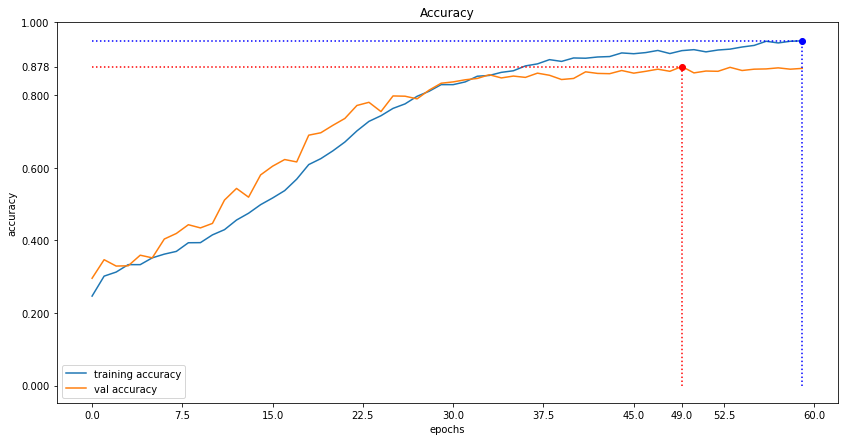

In [20]:
#224 224 40-60
plot60(history60)

In [22]:
y_pred = np.argmax(model.predict(X_test),axis=1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_e, y_pred))

Accuracy: 0.8738147337709701


In [24]:
np.save("lib/datasets/X_train.npy", X_train)
np.save("lib/datasets/X_test.npy", X_test)
np.save("lib/datasets/X_val.npy", X_val)
np.save("lib/datasets/y_train_e.npy", y_train_e)
np.save("lib/datasets/y_test_e.npy", y_test_e)
np.save("lib/datasets/y_val_e.npy", y_val_e)